# Fixed-point Iteration (不动点迭代法)

## 1 - 介绍

### 1.1 - The Fixed-point 不动点

如果给定一个方程 $g(x)$ 满足 $g\left(x^{*}\right)=x^{*}$，则 $x^{*}$ 是一个不动点。


### 1.2 - Mean Value theorem 中间值定理

如果 $f \in C[a, b]$，而且 $f$ 在 $(a, b),$ 可微，则 $\exists c \in(a, b)$，$s.t. f^{\prime}(c)=\frac{f(b)-f(a)}{b-a}$


### 1.3 - Existence theorem 存在定理

如果 $g \in C[a, b]$ 且 $g(x) \in[a, b]$，$\forall x \in[a, b]$， 则 $g$ 在 $[a, b]$ 至少有一个不动点。

### 1.4 - Uniqueness theorem 唯一定理

如果 $g^{\prime}(x)$ 在 $(a, b)$ 存在， 且存在 $0<k<1$：
$$
0<\left|g^{\prime}(x)\right| \leq k<1, \quad \forall x \in(a, b)
$$
则不动点 $g$ 在 $[a, b]$ 是唯一的。（充分但不必要条件）

## 2 - 不动点迭代法

### 2.1 - 算法
- **INPUT** initial approximation $p_{0}$; tolerance $TOL$; maximum number of iterations $N_{0}$.

- **OUTPUT** approximate solution $p$ or message of failure.

- **Step 1** $ \quad$ Set $i=1$

- **Step 2** $ \quad$ While $i \leq N_{0}$ do **Steps 3-6** 

    - **Step 3** $ \quad$ Set $p=g\left(p_{0}\right) . \quad$ (Compute $p_{i}$ )

    - **Step 4** $ \quad$ If $\left|p-p_{0}\right|<T O L$ then   
         **OUTPUT**($p$); (The procedure was successful.)   
         **STOP**.  

    - **Step 5** $ \quad$ Set $i=i+1$

    - **Step 6** $ \quad$ set $p_{0}=p . \quad\left(\text { Update } p_{0} .\right)$

### 2.2 - 不动点迭代的收敛规则

根据以上定理：  
(i) 让 $g(x) \in C[a, b]$ 且 $g([a, b]) \subset[a, b]$   
(ii) $ + g^{\prime}(x)$ 在 $(a, b)$ 存在，且对于任何 $x \in(a, b)$ 和常数 $k$ 有： $\left|g^{\prime}(x)\right| \leq k<1$   

所以，对于任何初始化值 $p_{0} \in[a, b]$,迭代可以表示为：
$$
p_{n}=g\left(p_{n-1}\right), \quad n \geq 1
$$
序列 $\left\{p_{n}\right\}_{n=1}^{\infty}$ 找出在 $[a, b]$ 上的唯一不动点 $p$。

**误差范围**   
如果 $g$ 满足以上理论，使用 $p_{n}$ 寻找近似值 $p$ 的误差范围可以定义为：
$\left|p_{n}-p\right| \leq k^{n} \max \left\{p_{0}-a, b-p_{0}\right\}$ 和 $\left|p_{n}-p\right| \leq \frac{k^{n}}{1-k}\left|p_{1}-p_{0}\right|$，所有 $n \geq 1$


## 3 - 示例：Python 定点迭代法求单变量方程

### 3.1 - 定点迭代法求一元方程 $f(x) = x^{2}- x-1 = 0$ 在 $[0, 2]$ 的根

In [1]:
import numpy as np

def SqrtFixedPoint(f, p0, tol=10e-5, N=100):
    """
    Fixed-point Iteration
    
    Args:
        f: fixed point equation
        p0: initial approximation
        tol: tolerance
        N: maximum number of iterations
        
    Returns:
        p: the fixed point solution
        xp: solution list
    """
    e = 1 # init error
    i = 0
    xp = [] # use to save solution
    while(e > tol and i < N):
        p = f(p0)
        e = np.linalg.norm(p-p0) # error at the current step
        p0 = p
        i += 1
        xp.append(p0)  # save the solution g(p) of the current step
    return p, xp

#### 3.1.1 解法1

求根问题可以通过以下步骤转化为定点问题：

$$
\begin{aligned}
&f(x)=x^{2}-x-1=0\\
&=>x^{2}-x-1=0\\
&=> x^{2}=x+1\\
&=>x=\pm \sqrt{x+1}\\
&=> g(x)=\sqrt{x+1}
\end{aligned}
$$

In [2]:
# 原方程 f(x)
fx = lambda x : x**2-x-1 

# 转化后的 g(x)
gx = lambda x : np.sqrt(x+1)

x_start = 0
xf, xp = SqrtFixedPoint(gx, x_start)

print("Fixed-point at x = %f" % xf)
print("After %d iterations, the root is %s" % (len(xp), xf))

Fixed-point at x = 1.618017
After 10 iterations, the root is 1.6180165422314876


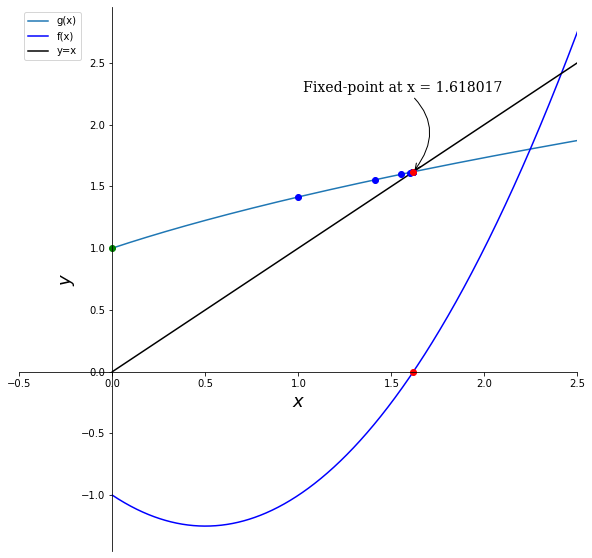

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# 用于画 g(x)
x = np.linspace(0, 2.5, 1000)
y = gx(x)

# 用于画 f(x)
fx_x = np.linspace(0, 2.5, 1000)
fx_y = fx(fx_x)

# 画线
plt.figure(figsize=(10, 10))
plt.plot(x, y) # g(x)
plt.plot( fx_x, fx_y, 'b') # f(x)
plt.plot(x, x, 'k', ) # y=x 
# 画点
plt.plot(
    xp, [gx(item) for item in xp], 'bo', # 迭代点
    xf, fx(xf), 'ro', # fixed point
    x_start, gx(x_start), 'go', # 初始点
) 

#截取x的某一部分
plt.xlim((-0.5, 2.5))

ax = plt.gca() # 获取当前轴
# 去掉轴上边和右边
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
# 移动下边和左边
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 把 Fixed-point 画出来
ax.plot(xf, gx(xf), 'ro',)
# root 点做一个注释
ax.annotate("Fixed-point at x = %f" % xf,
    fontsize=14, family="serif",
    xy=(xf, gx(xf)), xycoords='data',
    xytext=(-110, 80), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
plt.legend(['g(x)','f(x)', 'y=x'])

#### 3.1.2 解法2

同样的求根问题可能会转化出不同的 $g(x)$，比如通过以下步骤转化为定点问题，得到与上面不一样的 $g(x)$：

$$
\begin{aligned}
&f(x)=x^{2}-x-1=0\\
&=> x^{2}-x-1=0\\
&=> x^{2}=x+1\\
&=> x=1+\frac{1}{x}\\
&=> g(x)=1+\frac{1}{x}
\end{aligned}
$$

In [4]:
# 转化后的 g(x)
gx2 = lambda x : 1 + 1/x
    
x_start2 = 1
xf2, xp2 = SqrtFixedPoint(gx2, x_start2)

print("Fixed-point at x = %f" % xf2)
print("After %d iterations, the root is %s" % (len(xp2), xf2))

Fixed-point at x = 1.618056
After 11 iterations, the root is 1.6180555555555556


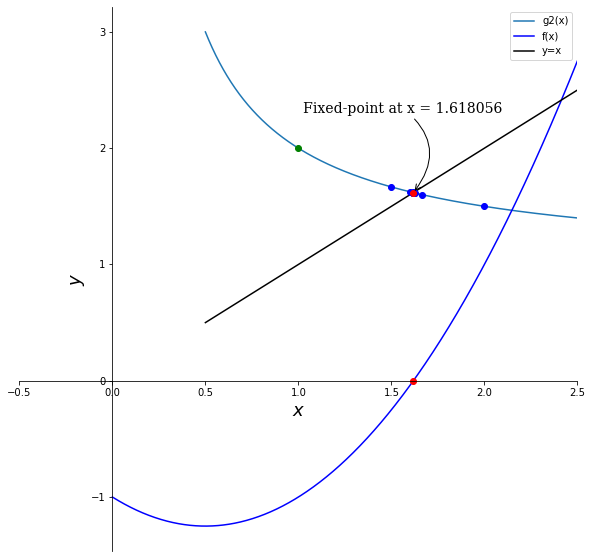

In [5]:
# 用于画 g(x)
x2 = np.linspace(0.5, 2.5, 1000)
y2 = gx2(x2)

# 用于画 f(x)
fx_x2 = np.linspace(0, 2.5, 1000)
fx_y2 = fx(fx_x2)

# 画线
plt.figure(figsize=(10, 10))
plt.plot(x2, y2) # g(x)
plt.plot( fx_x2, fx_y2, 'b') # f(x)
plt.plot(x2, x2, 'k', ) # y=x 
# 画点
plt.plot(
    xp2, [gx2(item) for item in xp2], 'bo', # 迭代点
    xf2, fx(xf2), 'ro', # fixed point
    x_start2, gx2(x_start2), 'go', # 初始点
) 

#截取x的某一部分
plt.xlim((-0.5, 2.5))

ax = plt.gca() # 获取当前轴
# 去掉轴上边和右边
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
# 移动下边和左边
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 把 Fixed-point 画出来
ax.plot(xf2, gx2(xf2), 'ro',)
# root 点做一个注释
ax.annotate("Fixed-point at x = %f" % xf2,
    fontsize=14, family="serif",
    xy=(xf2, gx2(xf2)), xycoords='data',
    xytext=(-110, 80), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
plt.legend(['g2(x)','f(x)', 'y=x'])

两次得到的结果是一样的。